I_assumed =  [0.         0.38268343 0.70710678 0.92387953 1.         0.92387953
 0.70710678 0.38268343 0.        ]
########################################################################
J_assumed =  [0.38268343 0.70710678 0.92387953 0.92387953 0.70710678 0.38268343]
########################################################################
Rz =  [[0.01       0.12539936 0.25019992 0.37513331 0.50009999 0.62507999
  0.75006666 0.87505714 1.00005   ]
 [0.12539936 0.01       0.12539936 0.25019992 0.37513331 0.50009999
  0.62507999 0.75006666 0.87505714]
 [0.25019992 0.12539936 0.01       0.12539936 0.25019992 0.37513331
  0.50009999 0.62507999 0.75006666]
 [0.37513331 0.25019992 0.12539936 0.01       0.12539936 0.25019992
  0.37513331 0.50009999 0.62507999]
 [0.50009999 0.37513331 0.25019992 0.12539936 0.01       0.12539936
  0.25019992 0.37513331 0.50009999]
 [0.62507999 0.50009999 0.37513331 0.25019992 0.12539936 0.01
  0.12539936 0.25019992 0.37513331]
 [0.75006666 0.62507999 0.50009999

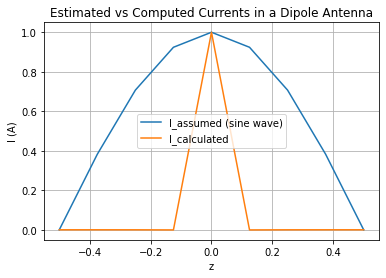

In [6]:
"""
EE2703: Applied Programming Lab 
Final Assignment: The End-semester Exam
Submitted by: Ayush Mukund Jamdar
Roll No.: EE20B018

The Problem: to see how good the assumption of sinusoidal current 
distribution in a dipole antenna is.

Starting parameters:
    - Antenna half-length: l = 50 cm
    - c = 2.9979e8 m/s
    - permeability mu0 = 4pi*10^-7 
    - N = 4  => number of sections in each half of the antenna
    - radius of wire a = 0.01 m
    - wavelength lambda = l*4 m
    - frequency f = c/lambda
    - Im = 1 A; current amplitude
    - wave number dz = 1/N; spacing of samples
"""

import numpy as np
import matplotlib.pyplot as plt

"""
Question 1:
    After N splits on each side, we have a total of 2N+1 sections.
    Sections in an array indexed 0 to 2N. (element N is the antenna feed)
    2N+1 currents with 2N-2 currents unknown: Boundary conditions
    Construct the current vector I for 2N+1 points in z
    Construct the current vector J for 2N-2 points in u
"""

# Start by assigning the starting parameters
l = 0.5  # length of the antenna
c = 2.9979e8  # speed of light
mu0 = 4 * np.pi * 1e-7  # permeability of free space
N = 4  # number of sections in each half of the antenna
a = 0.01  # radius of wire
lambda_ = l * 4  # wavelength
f = c / lambda_  # frequency
k = 2 * np.pi / lambda_  # wave number
dz = l / N  # step size
Im = 1  # current amplitude
z = np.linspace(-l, l, 2 * N + 1)
u = np.concatenate((z[1:N], z[N + 1 : 2 * N]))
I = Im * np.sin((2 * np.pi / lambda_) * (l - abs(z)))  # current vector
J = np.concatenate((I[1:N], I[N + 1 : 2 * N]))  # current vector J

"""
Question 2:
    Equation for each unknown current
    2.pi.a.H(zi) = Ii
    del x H = J
    Matrix Equation: H = (1/2pi.a)M*J
    M is a diagonal matrix
"""


def find_M(size=2 * N - 2):
    return np.identity(size) / (2 * np.pi * a)


"""
Question 3:
    Calculation of Vector Potential
    Potential Matrix = Summation[Pij*Ij + Pb*IN]
"""

# Finding Rz and Ru for each z and u

# Rz includes distances to known currents
# Dimensions of Rz: 2N+1 x 2N-2
Rz = np.sqrt(
    (np.ones((2 * N + 1, 2 * N + 1)) * a) ** 2
    + (np.array([z] * (2 * N + 1)) - np.array([z] * (2 * N + 1)).T) ** 2
)

# Ru includes distances to unknown currents
# Dimensions of Ru: 2N-2 x 2N-2
Ru = np.sqrt(
    (np.ones((2 * N - 2, 2 * N - 2)) * a) ** 2
    + (np.array([u] * (2 * N - 2)) - np.array([u] * (2 * N - 2)).T) ** 2
)

Rij = Ru  # Rij is the matrix of distances between unknown currents
# Dimensions of Rij: (2N-2, 2N-2)

# Pij = (mu0 / (4 * np.pi)) * np.exp(-1j * k * Rij) * dz / Rij
Pij = (mu0 / (4 * np.pi) * np.exp(-complex(0, k) * Ru) * dz) / (Ru)

RiN = np.concatenate(((Rz[:, N])[1:N], (Rz[:, N])[N + 1 : 2 * N]))
# Dimensions of RiN: 2N-2 x 1; See equations

Pb = (mu0 / (4 * np.pi)) * np.exp(-1j * (k * RiN)) * dz / RiN

Qij = -Pij * (a / mu0) * (complex(0, -k) / Ru - 1 / Ru**2)
Qb = -Pb * a / mu0 * ((-1j * k) / RiN - 1 / (RiN**2))

"""
Question 4:
    Finding the computes currents and comparing with the assumed sinusoidal
    (M-Q)J = Qb.Im
"""
J_calculated = np.dot(np.linalg.inv(find_M(2 * N - 2) - Qij), Qb * Im)
I_calculated = np.concatenate(
    ([0], np.concatenate((J_calculated[: N - 1], [Im], J_calculated[N - 1 :])), [0])
)

if N == 4:
    print("I_assumed = ", I)
    print("########################################################################")
    print("J_assumed = ", J)
    print("########################################################################")
    print("Rz = ", Rz)
    print("########################################################################")
    print("Ru = ", Ru)
    print("########################################################################")
    print("Pij = ", Pij)
    print("########################################################################")
    print("Pb = ", Pb)
    print("########################################################################")
    print("Qij = ", Qij)
    print("########################################################################")
    print("Qb = ", Qb)
    print("########################################################################")
    print("I_calculated = ", I_calculated)
    print("########################################################################")
    print("J_calculated = ", J_calculated)
    print("########################################################################")

# plot the current distribution
plt.plot(z, I, label="I_assumed (sine wave)")
plt.plot(z, I_calculated, label="I_calculated")
plt.legend()
plt.grid()
plt.xlabel("z")
plt.ylabel("I (A)")
plt.title("Estimated vs Computed Currents in a Dipole Antenna")
plt.show()

########################################################################################


In [7]:
I_calculated

array([ 0.00000000e+00+0.00000000e+00j, -3.30256482e-05+1.06463792e-05j,
       -9.54636142e-05+1.15207845e-05j, -6.48254232e-04+1.20785421e-05j,
        1.00000000e+00+0.00000000e+00j, -6.48254232e-04+1.20785421e-05j,
       -9.54636142e-05+1.15207845e-05j, -3.30256482e-05+1.06463792e-05j,
        0.00000000e+00+0.00000000e+00j])